In [2]:
import torch
torch.manual_seed(0)
from torchvision import datasets, transforms

from projections import LayerModifierZCA
from notebook_train import run_train_test_loop, test
from cifar_model import mCNN_k


In [1]:
# for now, no augmentations



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

dataset1 = datasets.CIFAR10('data', train=True, download=True,
                   transform=transform)
dataset2 = datasets.CIFAR10('data', train=False,
                   transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1, num_workers = 4, pin_memory = True, batch_size=125, shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset2,  num_workers = 4, pin_memory = True, batch_size=125)

model = mCNN_k().to(device)

    
retrain = False
if retrain:
    run_train_test_loop(model, train_loader, test_loader, "cifar_10_zca", epochs=50, device=device)    

model = mCNN_k().to(device).eval()
state_dict = torch.load("models/cifar_10_zca.pt",) # map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
test(model, device, test_loader, torch.nn.CrossEntropyLoss())


NameError: name 'torch' is not defined

In [ ]:
# pip install torchinfo
from torchinfo import summary


summary(model, input_size=(1, 3, 32, 32))

## CIFAR-10 experiments *with* random initialization for layers > $i$

In [ ]:
net1 = mCNN_k().to(device)
net1[0] = LayerModifierZCA(model[0]).to(device)
for p in net1[0].parameters():
    p.requires_grad = False


test(net1, device, test_loader, torch.nn.CrossEntropyLoss())
summary(net1, input_size=(1, 3, 32, 32))

In [ ]:
run_train_test_loop(
    net1, 
    train_loader, 
    test_loader, 
    "cifar_10_zca_freeze_layer1_reinit_conv1x1", 
    epochs=40, 
    device=device
)



In [8]:
state_dict = torch.load("models/cifar_10_zca_freeze_layer1_reinit_conv1x1.pt",) # map_location=torch.device('cpu'))
net1.load_state_dict(state_dict)
test(net1, device, test_loader, torch.nn.CrossEntropyLoss())



Test set: Average loss: 1.0564, Accuracy: 8054/10000 (81%)



(1.0563687823712826, 80.54)

In [9]:
net2 = mCNN_k().to(device)
net2[0] = net1[0]
net2[2] = LayerModifierZCA(net1[2]).to(device)

for p in net2[0].parameters():
    p.requires_grad = False
for p in net2[2].parameters():
    p.requires_grad = False

summary(net2)

tensor(0., device='cuda:0')
tensor(0.0274, device='cuda:0', grad_fn=<MeanBackward0>)


Layer (type:depth-idx)                   Param #
Sequential                               --
├─Conv2d: 1-1                            (1,792)
├─ReLU: 1-2                              --
├─Conv2d: 1-3                            (73,728)
├─ReLU: 1-4                              --
├─MaxPool2d: 1-5                         --
├─Conv2d: 1-6                            294,912
├─ReLU: 1-7                              --
├─MaxPool2d: 1-8                         --
├─Conv2d: 1-9                            1,179,648
├─ReLU: 1-10                             --
├─MaxPool2d: 1-11                        --
├─MaxPool2d: 1-12                        --
├─Flatten: 1-13                          --
├─Linear: 1-14                           5,120
Total params: 1,555,200
Trainable params: 1,479,680
Non-trainable params: 75,520

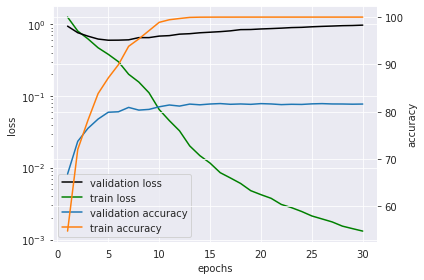


best acc: 81.72

Test set: Average loss: 0.7910, Accuracy: 8172/10000 (82%)



(0.7909739952534437, 81.72)

In [10]:
run_train_test_loop(
    net2, 
    train_loader, 
    test_loader, 
    "cifar_10_zca_freeze_layer2_reinit_conv1x1", 
    epochs=30, 
    device=device
)  

state_dict = torch.load("models/cifar_10_zca_freeze_layer2_reinit_conv1x1.pt",) # map_location=torch.device('cpu'))
net2.load_state_dict(state_dict)
test(net2, device, test_loader, torch.nn.CrossEntropyLoss())

In [ ]:
state_dict.keys()

In [13]:
net3 = mCNN_k().to(device)
net3[0] = net2[0]
net3[2] = net2[2]
net3[5] = LayerModifierZCA(net2[5]).to(device)

for p in net3[0].parameters():
    p.requires_grad = False
for p in net3[2].parameters():
    p.requires_grad = False
for p in net3[5].parameters():
    p.requires_grad = False


summary(net3)

tensor(0., device='cuda:0')
tensor(0.0310, device='cuda:0', grad_fn=<MeanBackward0>)


Layer (type:depth-idx)                   Param #
Sequential                               --
├─Conv2d: 1-1                            (1,792)
├─ReLU: 1-2                              --
├─Conv2d: 1-3                            (73,728)
├─ReLU: 1-4                              --
├─MaxPool2d: 1-5                         --
├─Conv2d: 1-6                            (294,912)
├─ReLU: 1-7                              --
├─MaxPool2d: 1-8                         --
├─Conv2d: 1-9                            1,179,648
├─ReLU: 1-10                             --
├─MaxPool2d: 1-11                        --
├─MaxPool2d: 1-12                        --
├─Flatten: 1-13                          --
├─Linear: 1-14                           5,120
Total params: 1,555,200
Trainable params: 1,184,768
Non-trainable params: 370,432

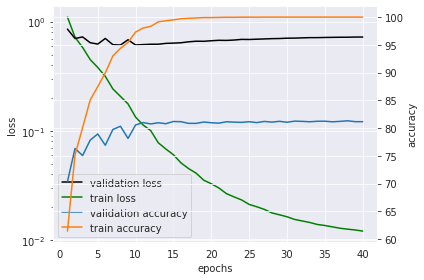


best acc: 81.3


In [12]:
run_train_test_loop(
    net3, 
    train_loader, 
    test_loader, 
    "cifar_10_zca_freeze_layer3_reinit_conv1x1", 
    epochs=40, 
    device=device
)    

In [14]:
state_dict = torch.load("models/cifar_10_zca_freeze_layer3_reinit_conv1x1.pt",) # map_location=torch.device('cpu'))
net3.load_state_dict(state_dict)
test(net3, device, test_loader, torch.nn.CrossEntropyLoss())


Test set: Average loss: 0.7204, Accuracy: 8130/10000 (81%)



(0.7204133927822113, 81.3)

In [17]:
net4 = mCNN_k().to(device)
net4[0] = net3[0]
net4[2] = net3[2]
net4[5] = net3[5]
net4[8] = LayerModifierZCA(net3[8]).to(device)

for p in net4[0].parameters():
    p.requires_grad = False
for p in net4[2].parameters():
    p.requires_grad = False
for p in net4[5].parameters():
    p.requires_grad = False
for p in net4[8].parameters():
    p.requires_grad = False


summary(net4)

tensor(0., device='cuda:0')
tensor(0.0262, device='cuda:0', grad_fn=<MeanBackward0>)


Layer (type:depth-idx)                   Param #
Sequential                               --
├─Conv2d: 1-1                            (1,792)
├─ReLU: 1-2                              --
├─Conv2d: 1-3                            (73,728)
├─ReLU: 1-4                              --
├─MaxPool2d: 1-5                         --
├─Conv2d: 1-6                            (294,912)
├─ReLU: 1-7                              --
├─MaxPool2d: 1-8                         --
├─Conv2d: 1-9                            (1,179,648)
├─ReLU: 1-10                             --
├─MaxPool2d: 1-11                        --
├─MaxPool2d: 1-12                        --
├─Flatten: 1-13                          --
├─Linear: 1-14                           5,120
Total params: 1,555,200
Trainable params: 5,120
Non-trainable params: 1,550,080

In [ ]:
state_dict.keys()

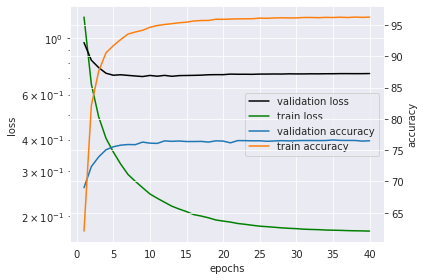


best acc: 76.62


In [18]:
run_train_test_loop(
    net4, 
    train_loader, 
    test_loader, 
    "cifar_10_zca_freeze_layer4_reinit_conv1x1", 
    epochs=40, 
    device=device
)    

In [19]:
state_dict = torch.load("models/cifar_10_zca_freeze_layer4_reinit_conv1x1.pt",) # map_location=torch.device('cpu'))
net4.load_state_dict(state_dict)
test(net4, device, test_loader, torch.nn.CrossEntropyLoss())


Test set: Average loss: 0.7258, Accuracy: 7662/10000 (77%)



(0.7257876951247454, 76.62)